In [2]:
###importing necessary packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [3]:
###Reading the health_data dataset into a pandas dataframe

health_df = pd.read_csv('health_data.csv')

In [6]:
##Basic overlook on the dataset
health_df.head()


,_f8,_f1,_f2,_f3,_f4,_f5,_f6,_f7,is_diabetic
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [7]:
print("The dataset shape is:", health_df.shape)

The dataset shape is: (741, 9)


In [9]:
###Checking the columns and their datatypes
print("The columns in the dataset are:", health_df.columns)


The columns in the dataset are: Index(['_f8', '_f1', '_f2', '_f3', '_f4', '_f5', '_f6', '_f7', 'is_diabetic'], dtype='object')


In [11]:
print("The datatypes of the columns are:\n", health_df.dtypes)

The datatypes of the columns are:
 _f8              int64
_f1            float64
_f2            float64
_f3            float64
_f4            float64
_f5            float64
_f6            float64
_f7              int64
is_diabetic      int64
dtype: object


In [12]:
##The question asks to find problems in the dataset.

##Step 1: Checking for missing values

print("The number of missing values in each column is:\n", health_df.isnull().sum())

The number of missing values in each column is:
 _f8             0
_f1            37
_f2            37
_f3            37
_f4            37
_f5            37
_f6             0
_f7             0
is_diabetic     0
dtype: int64


In [27]:
### Number of rows with missing values
print("The number of rows with missing values is:", health_df.isnull().any(axis=1).sum())

###Checking percent of rows with missing values
missing_rows_percent = health_df.isnull().any(axis=1).sum() / len(health_df) * 100
print("The percent of missing values in each column is:", missing_rows_percent,"%")

The number of rows with missing values is: 37
The percent of missing values in each column is: 4.993252361673414 %


In [30]:
###Checking how many of the missing rows had is_diabetic as 1 and is_diabetic as 0
missing_rows = health_df[health_df.isnull().any(axis=1)]
print("The number of missing rows with target variable as 1 is:", missing_rows[missing_rows['is_diabetic'] == 1].shape[0])
print("The number of missing rows with target variable as 0 is:", missing_rows[missing_rows['is_diabetic'] == 0].shape[0])

The number of missing rows with target variable as 1 is: 14
The number of missing rows with target variable as 0 is: 23


#### Here, we see that there are missing values for 5 of the independent features. There are no missing values in the target variable. Moreover, the missing values seem to be more or less random without following any class bias (missing from a particular class). We need to check the class imbalance here later.

In [13]:
##Step 2: Checking for duplicates
print("The number of duplicate rows in the dataset is:", health_df.duplicated().sum())

The number of duplicate rows in the dataset is: 0


#### There are NO duplicated rows in the dataset (dataset with target variable)

In [22]:
###Checking if the rows without target variable are duplicates: This will mean that the target variable is ambiguos for such rows
print("The number of rows with ambiguos targets:", health_df.iloc[:,:-1].duplicated().sum())

The number of rows with ambiguos targets: 0


#### Hence, we can conclude that there are no duplicated rows and no ambiguous (non useful) rows

The value counts for the target variable are:
 is_diabetic
0    481
1    260
Name: count, dtype: int64


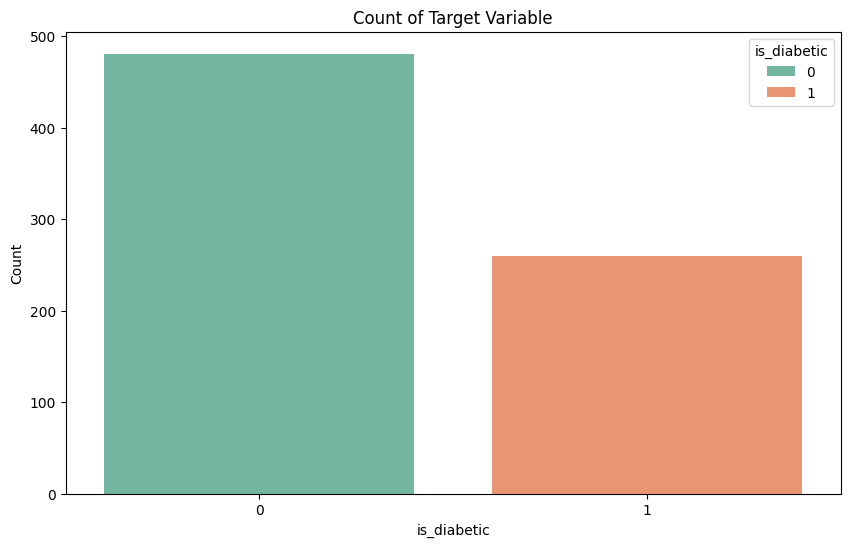

In [32]:
###Step 3: Checking for data imbalances, assuming that teh target variable is 'is_diabetic'
print("The value counts for the target variable are:\n", health_df['is_diabetic'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='is_diabetic', data=health_df, hue='is_diabetic', palette='Set2')
plt.title('Count of Target Variable')
plt.xlabel('is_diabetic')
plt.ylabel('Count')
plt.show()

In [34]:
##missing value percent from each class [raw calculations]
missng_percent_1 = (23/481)*100
missng_percent_0 = (14/260)*100
print("The missing value percent from class 1 is:", missng_percent_1)
print("The missing value percent from class 0 is:", missng_percent_0)

The missing value percent from class 1 is: 4.781704781704782
The missing value percent from class 0 is: 5.384615384615385


#### From step 3, we see there is moderate imbalance in the data, although it is not extreme. Also, teh missing values from each classes are around 5%, which can be eliminated from the dataset.

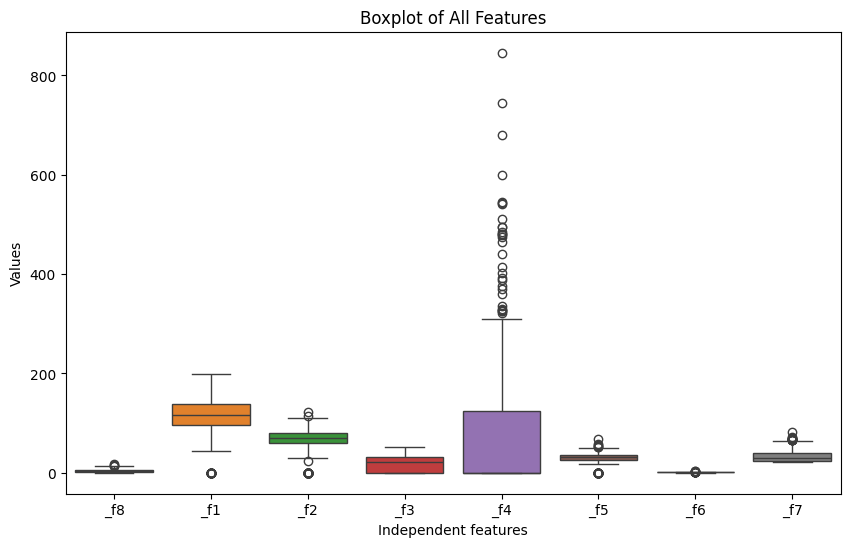

In [38]:
###Step 4: Checking for outliers in the independent features. We will use boxplots for this.
plt.figure(figsize=(10, 6))
sns.boxplot(data=health_df.iloc[:,:-1], orient='v')
plt.title('Boxplot of All Features')
plt.xlabel('Independent features')
plt.ylabel('Values')
plt.show()

#### We see from the box plot that there are outliers in the features, especially in significant numbers for the feature _f4.

In [42]:
###Checking the percent of outliers in each feature
outliers_percent = {}
for col in health_df.columns[:-1]:
    q1 = health_df[col].quantile(0.25)
    q3 = health_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = health_df[(health_df[col] < lower_bound) | (health_df[col] > upper_bound)]
    outliers_percent[col] = (len(outliers) / len(health_df)) * 100
print("The percent of outliers in each feature is:\n", outliers_percent)

The percent of outliers in each feature is:
 {'_f8': 0.5398110661268556, '_f1': 5.398110661268556, '_f2': 9.176788124156547, '_f3': 0.0, '_f4': 4.048582995951417, '_f5': 6.747638326585695, '_f6': 3.7786774628879893, '_f7': 2.0242914979757085}


## Brief overview of the data analysis( part a):
### - There are missing values which are random and contribute to around 5% of the dataset size.
### - There are no duplicated or non-useful rows that could be found.
### - There are no rows containing data with inconsistent data type.
### - There is a moderate class imbalance.
### - There are outliers for a subset of features, but they are <10% of the data size. 


### To rectify the problems identified, we can do the following steps:

#### - Missing values: Eliminate the rows as this constitutes <5% of the total dataset size and the missing values are at random.
#### - Class imbalance: We will use the SMOTE technique to create synthetic samples for the is_diabetic=1 class.
#### - For handling outliers: Since, this is a medical domain dataset, it might not be viable to remove all outliers. Also, these outliers might be actual possible values. We will only remove rows which has extreme outliers (such cases will be less in number and taht should not impact our downstream tasks significantly). Also, using Decision Tree based models for classification would be better to handle outliers.

In [43]:
###Removing the missing values
health_df = health_df.dropna()
print("The number of rows after removing missing values is:", health_df.shape[0])

The number of rows after removing missing values is: 704


In [61]:
###removing extreme outliers : IQR + 2*IQR and above


def remove_outliers(df):
    """
    Function to remove outliers from the dataframe based on IQR method."""
    for col in df.columns[:-1]:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 3 * iqr
        upper_bound = q3 + 3 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
health_df = remove_outliers(health_df)
print("The number of rows after removing outliers is:", health_df.shape[0])

The number of rows after removing outliers is: 683


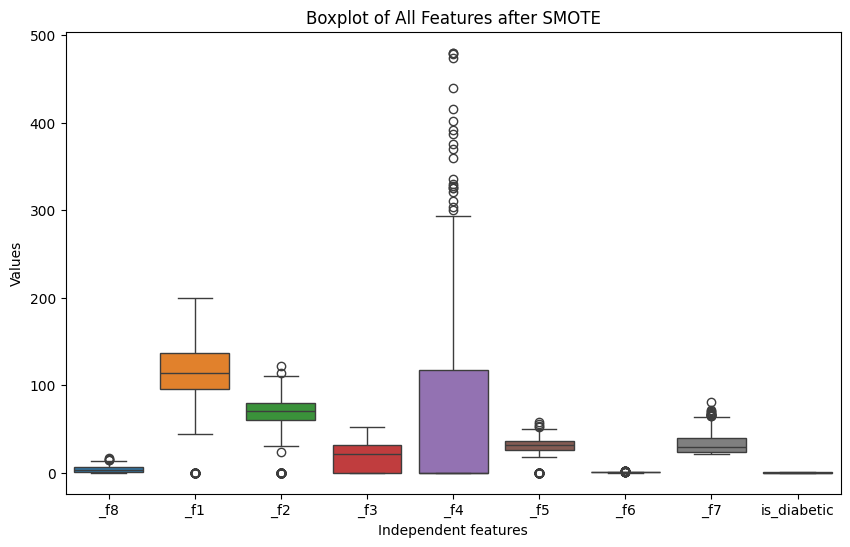

In [52]:
#box plot of the resampled data
plt.figure(figsize=(10, 6))
sns.boxplot(data=health_df, orient='v')
plt.title('Boxplot of All Features after SMOTE')
plt.xlabel('Independent features')
plt.ylabel('Values')
plt.show()

In [53]:
####Using SMOTE to balance the dataset
from imblearn.over_sampling import SMOTE
X_features = health_df.iloc[:,:-1]
y_labels = health_df.iloc[:,-1]
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_features, y_labels)


/Users/kaushikchakraborty/Desktop/github/ePGD-IITB/epgd/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [54]:
X_resampled = pd.DataFrame(X_resampled, columns=X_features.columns)
y_resampled = pd.Series(y_resampled, name='is_diabetic')
print("The number of rows after SMOTE is:", X_resampled.shape[0])


The number of rows after SMOTE is: 904


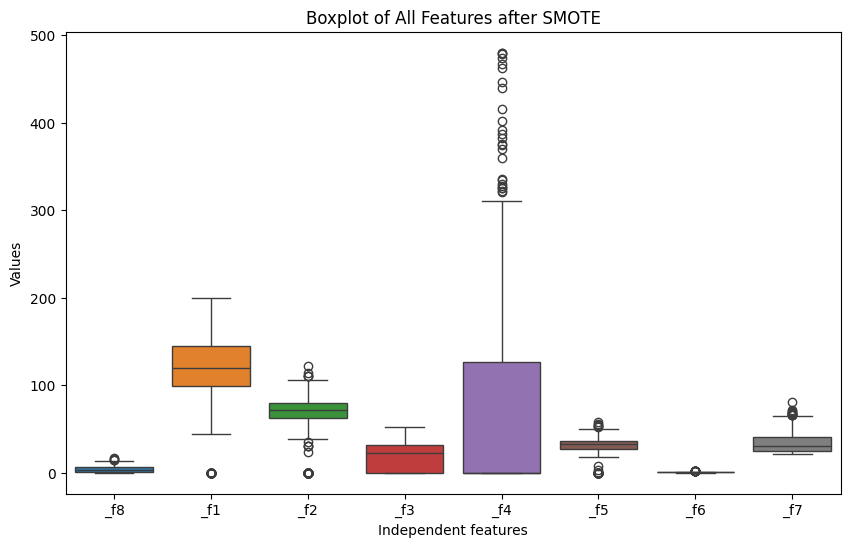

In [55]:
#box plot of the resampled data
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_resampled, orient='v')
plt.title('Boxplot of All Features after SMOTE')
plt.xlabel('Independent features')
plt.ylabel('Values')
plt.show()

### In the above step, we have removed outliers which are beyond a extreme threshold (IQR+2*IQR). This is done because outliers might be helpful given that this dataset is specific to health domain.

The value counts for the target variable are:
              count
is_diabetic       
1              452
0              452


/var/folders/bp/_p8p3d4j4qq20ccmqb6cjs2w0000gn/T/ipykernel_85465/3386666006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_diabetic', data=pd.DataFrame(y_resampled), palette='Set2')


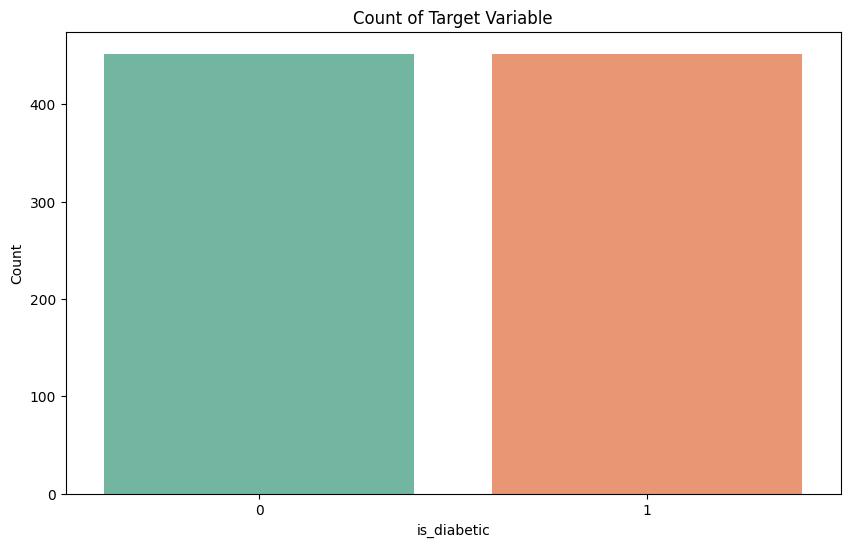

In [60]:
##Visualizing the distribution of the target variable after SMOTE through a bar plot
print("The value counts for the target variable are:\n", pd.DataFrame(y_resampled.value_counts()))
plt.figure(figsize=(10, 6))
sns.countplot(x='is_diabetic', data=pd.DataFrame(y_resampled), palette='Set2')
plt.title('Count of Target Variable')
plt.xlabel('is_diabetic')
plt.ylabel('Count')
plt.show()


### From the above plot, we can see that the class imbalance problem is resolved now using the SMOTE technique.

In [62]:
##Splitting the resampled dataset into train and test sets with 80-20 random split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [85]:
### Training a random forest based classifier on the resampled dataset, because it is expected to be robust to outliers and noise.

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=50,max_samples=500, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_samples=500, random_state=42)

In [86]:
##Making predictionson the test set
y_pred = rf_model.predict(X_test)
from sklearn.metrics import classification_report
print("The classification report is:\n", classification_report(y_test, y_pred))

The classification report is:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        88
           1       0.84      0.83      0.83        93

    accuracy                           0.83       181
   macro avg       0.83      0.83      0.83       181
weighted avg       0.83      0.83      0.83       181



## From the classification report, we have the following results:
#### - Average accuracy : 0.83
#### - Average precision: 0.83
#### - Average recall: 0.83
#### - Average f1 score: 0.83

### Based on the metrics on test set, we can say that the clasifier performance is decent accross all metrics. 
#### - Precision and recall are similar and above 0.8, that implies that false negatives and false positives are well balanced and their instances are low in numbers.
#### - Although, it would have been better if the recall was higher than precison (lesser false negatives), given the use case of prediction of a medical ailment.

#### Domain knowledge and feature engineering would have helped in preprocessing the features while deciding on what to do with the outliers in few of the features. Proper domain knowledge would have helped in deciding whether to omit all the outliers, whether to transform features having outliers (like using logarithm, or other transformations).

#### Also, domain knowledge would have helped in designing features that are better predictors for diabetes, and that would have helped improve the recall of the classification model.

#### Other than that, also imputation of missing values rather than ommitting them could be done, if we had the knowledge of each features, because the target variables were not missing!